In [21]:
""" Importando arquivos """
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt

In [20]:
database = pd.read_csv("T1.csv")
database.columns = ["Data/hora", "ActivePower(kW)", "WindSpeed (m/s)", "Curva Teorica(KWh)", "DireçãoVento(º)"]
del database["DireçãoVento(º)"]
database['Data/hora'] = pd.to_datetime(database['Data/hora'], format="%d %m %Y %H:%M")
display(database)

,Data/hora,ActivePower(kW),WindSpeed (m/s),Curva Teorica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


<Axes: xlabel='WindSpeed (m/s)', ylabel='ActivePower(kW)'>

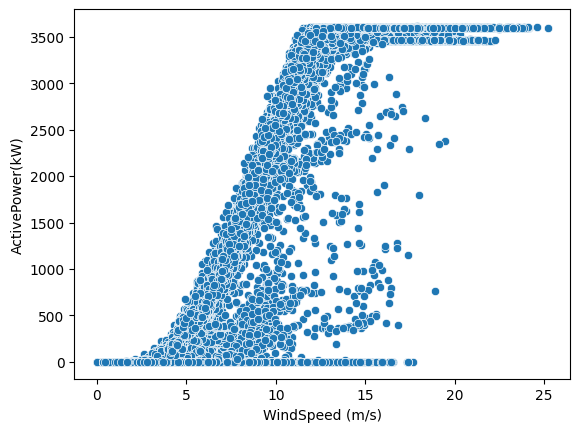

In [23]:
sns.scatterplot(data=database, x='WindSpeed (m/s)', y='ActivePower(kW)')


<Axes: xlabel='WindSpeed (m/s)', ylabel='Curva Teorica(KWh)'>

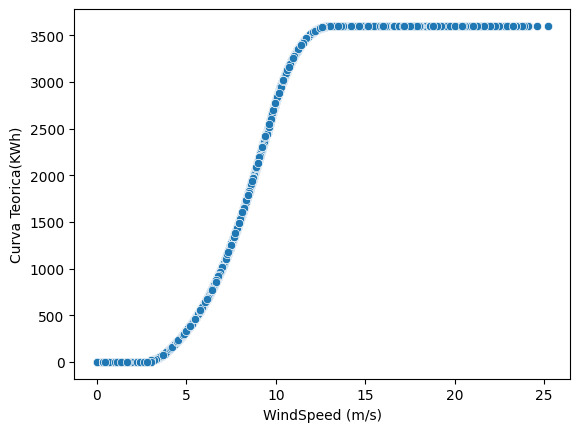

In [24]:
sns.scatterplot(data=database, x='WindSpeed (m/s)', y='Curva Teorica(KWh)')



In [25]:
pot_real = database['ActivePower(kW)'].to_list()
pot_teorica = database['Curva Teorica(KWh)'].to_list()

pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

""" print (len(pot_max), len(pot_min)) """
for p, potencia in enumerate(pot_real):
    if potencia >=pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

print(dentro_limite.count('Dentro')/len(dentro_limite))

0.37286760340391845


In [26]:
database['DentroLimite'] = dentro_limite
display (database)


,Data/hora,ActivePower(kW),WindSpeed (m/s),Curva Teorica(KWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


<Axes: xlabel='WindSpeed (m/s)', ylabel='ActivePower(kW)'>

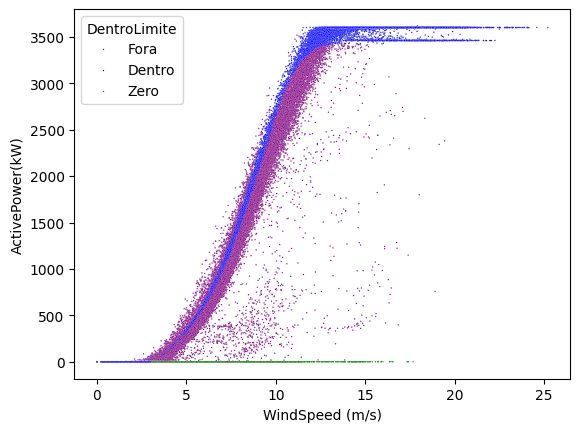

In [33]:
cores = {'Dentro': 'blue', 'Fora':'purple', 'Zero':'green'}
sns.scatterplot(data=database, x='WindSpeed (m/s)', y='ActivePower(kW)', hue='DentroLimite', s=1, palette=cores)
